# Задача 3: цифры

### Let's Import all necessary libraries

In [244]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

import os

In [245]:
os.chdir("C:/Users/bahra/Desktop/Lect_01/AD на Python/Задачи для лабораторной 1-3/задача_3_цифры")

## Standardization Data and Data Cleaning
#### I will solve many problems of the file in on line of code

* I will make the city column index of the dataframe, so we only get numbers to work with
* The data is concatenated by ';', I will seperate them using 'sep' parameter.
* The numbers are object type, because of the ',' so will choose decimal parameter to do the trick

In [246]:
df = pd.read_csv('digit.dat', sep=";", decimal=',' , header = 0, index_col=False)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       500 non-null    object
 1   B       500 non-null    object
 2   C       500 non-null    object
 3   D       500 non-null    object
 4   E       500 non-null    object
 5   F       500 non-null    object
 6   G       500 non-null    object
 7   H       500 non-null    object
 8   A2      500 non-null    object
 9   B2      500 non-null    object
 10  C2      500 non-null    object
 11  D2      500 non-null    object
 12  E2      500 non-null    object
 13  F2      500 non-null    object
 14  G2      500 non-null    object
 15  H2      500 non-null    object
dtypes: object(16)
memory usage: 62.6+ KB


In [248]:
df.head()

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


* Let's drop the duplicated columns

In [249]:
df = df.drop(['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2'], axis=1)

In [250]:
df.head()

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


* Let's convert the data into integer values, so we can work with it.

In [251]:
# I am using numpy.where to change the digits types into int.
# There are many other way to do this; pandas.apple() or pandas.replace()
df['B'] = np.where(df['B'] == "ZERO", 0, 1)
df['C'] = np.where(df['C'] == "ZERO", 0, 1)
df['D'] = np.where(df['D'] == "ZERO", 0, 1)
df['E'] = np.where(df['E'] == "ZERO", 0, 1)
df['F'] = np.where(df['F'] == "ZERO", 0, 1)
df['G'] = np.where(df['G'] == "ZERO", 0, 1)
df['H'] = np.where(df['H'] == "ZERO", 0, 1)

#### As I noticed there are whitespaces in the column 'A'
* Let's remove them using the str.strip method

In [252]:
df['A'] = df['A'].str.strip()

In [253]:
# Now let's replace the digits into int
df = df.replace({'A' : { 'zero' : 0, 'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4, 
                   'five' : 5, 'six' : 6, 'seven' : 7, 'eight' : 8, 'nine' : 9}})

#### Now our data is ready for preprocessing

In [254]:
df.head(10)

,A,B,C,D,E,F,G,H
0,7,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,4,0,1,1,1,0,1,0
3,2,1,1,1,1,1,0,0
4,8,0,1,1,1,1,1,1
5,1,0,0,1,0,0,1,0
6,5,1,1,0,1,0,1,1
7,6,1,0,0,1,1,1,1
8,2,1,0,1,1,1,0,1
9,8,1,1,1,1,0,1,1


##### Now let's select the necessery columns for clustering

C:\Users\bahra\AppData\Local\Temp\ipykernel_23832\1360750144.py:5: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (76). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df[['B','C','D','E', 'F', 'G', 'H']]) for k in K]
C:\Users\bahra\AppData\Local\Temp\ipykernel_23832\1360750144.py:5: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (77). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df[['B','C','D','E', 'F', 'G', 'H']]) for k in K]
C:\Users\bahra\AppData\Local\Temp\ipykernel_23832\1360750144.py:5: ConvergenceWarning: Number of distinct clusters (75) found smaller than n_clusters (78). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df[['B','C','D','E', 'F', 'G', 'H']]) for k in K]
C:\Users\bahra\AppData\Local\Temp\ipy

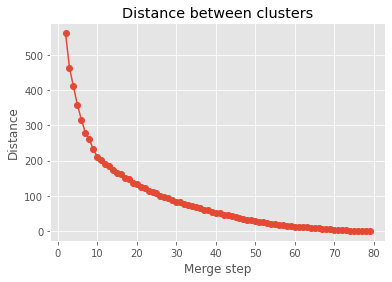

In [255]:
# A range of values between 2 and 80
K = range(2, 80)


models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df[['B','C','D','E', 'F', 'G', 'H']]) for k in K]

dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.title('Distance between clusters')
plt.xlabel('Merge step')
plt.ylabel('Distance')
plt.show()

Text(30, 221, '8 Cluster')

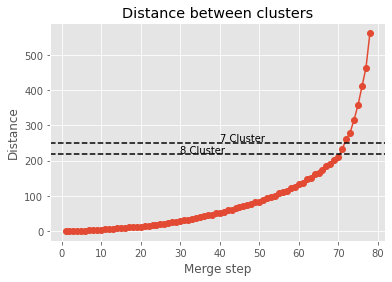

In [256]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between clusters')
plt.xlabel('Merge step')
plt.ylabel('Distance')
plt.axhline(250, c='k', linestyle='dashed')
plt.axhline(220, c='k', linestyle='dashed')
plt.text(40, 255, '7 Cluster')
plt.text(30, 221, '8 Cluster')

# Observations
* It can be seen from the picture that if we stop cluster merging at a distance of approximately 220, we will get 8 clusters, and at 250 we will get 7 clusters.

* For efficiency I will select 250 -- 7 clusters, because further, the distance between the clusters ceases to change significantly.

In [257]:
# Now let's see what kind of values we got from K-means in the model
model = KMeans(n_clusters=7, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df[['B','C','D','E', 'F', 'G', 'H']])
df['cluster'] = model.labels_
df.groupby('A').mean()

,B,C,D,E,F,G,H,cluster
A,,,,,,,,
0,0.904762,0.857143,0.976190,0.119048,0.904762,0.928571,0.880952,3.595238
1,0.093023,0.069767,0.930233,0.093023,0.209302,0.883721,0.162791,2.348837
2,0.883721,0.093023,0.813953,0.930233,0.883721,0.023256,0.930233,0.930233
3,0.909091,0.145455,0.909091,0.927273,0.145455,0.945455,0.854545,3.836364
4,0.076923,0.865385,0.884615,0.980769,0.153846,0.884615,0.115385,5.500000
5,0.907407,0.981481,0.148148,0.981481,0.111111,0.925926,0.888889,1.425926
6,0.900000,0.880000,0.020000,0.880000,0.940000,0.900000,0.880000,2.980000
7,0.875000,0.145833,0.875000,0.125000,0.083333,0.916667,0.083333,2.333333
8,0.913793,0.948276,0.896552,0.965517,0.827586,0.879310,0.879310,3.603448


#### Let's group by cluster and column A

## Scenario: 
#### There are 7 variables in the data with the names "B" - "H", measured in nominal scale
* 0 = line present
* 1 = no line

###### Lines correspond to dashes on the calculator screen
* B - top horizontal
* C - upper left vertical
* D - upper right vertical
* E - middle horizontal
* F - lower left vertical
* G - lower right vertical
* H - bottom horizontal.

In [258]:
df.groupby(['cluster', 'A']).mean()

B         C         D         E         F         G  \
cluster A                                                               
0       0  1.000000  0.000000  1.000000  1.000000  1.000000  0.500000   
        2  0.852941  0.000000  0.823529  0.941176  1.000000  0.000000   
        3  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
        4  0.000000  0.000000  1.000000  1.000000  1.000000  0.000000   
        7  1.000000  0.000000  1.000000  0.500000  1.000000  0.500000   
        8  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
        9  1.000000  0.000000  1.000000  1.000000  1.000000  0.000000   
1       0  1.000000  1.000000  1.000000  0.500000  0.000000  1.000000   
        3  0.857143  1.000000  0.714286  0.857143  0.000000  1.000000   
        5  0.913043  1.000000  0.108696  0.978261  0.000000  0.956522   
        6  1.000000  1.000000  0.000000  1.000000  0.000000  1.000000   
        7  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
        8  0.857143  1.000000  0.857143  1.000000  0.000000  0.714286   
        9  1.000000  1.000000  0.911765  0.970588  0.000000  0.911765   
2       0  1.000000  0.500000  1.000000  0.000000  0.500000  1.000000   
        1  0.102564  0.051282  0.923077  0.000000  0.230769  0.897436   
        4  0.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
        7  0.842105  0.157895  0.894737  0.000000  0.052632  0.921053   
3       0  1.000000  1.000000  0.000000  0.000000  1.000000  1.000000   
        2  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
        4  0.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
        5  0.750000  1.000000  0.000000  1.000000  1.000000  0.750000   
        6  0.891304  0.891304  0.000000  0.869565  1.000000  0.891304   
        8  1.000000  1.000000  0.000000  1.000000  1.000000  0.600000   
        9  1.000000  1.000000  0.000000  1.000000  1.000000  0.000000   
4       0  0.911765  0.911765  1.000000  0.058824  1.000000  0.941176   
        2  1.000000  1.000000  1.000000  0.666667  1.000000  0.000000   
        3  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
        5  1.000000  1.000000  1.000000  1.000000  1.000000  0.500000   
        6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
        8  0.926829  1.000000  1.000000  0.951220  1.000000  0.926829   
        9  1.000000  1.000000  1.000000  0.500000  1.000000  1.000000   
5       1  0.000000  0.000000  1.000000  1.000000  0.000000  1.000000   
        2  1.000000  0.000000  0.800000  1.000000  0.000000  0.000000   
        3  0.900000  0.000000  0.925000  0.950000  0.000000  0.925000   
        4  0.000000  0.000000  1.000000  1.000000  0.000000  1.000000   
        5  1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   
        6  1.000000  0.000000  0.000000  1.000000  0.000000  1.000000   
        7  1.000000  0.000000  0.714286  0.714286  0.000000  1.000000   
        8  1.000000  0.000000  1.000000  1.000000  0.000000  1.000000   
        9  1.000000  0.000000  0.700000  1.000000  0.000000  1.000000   
6       0  0.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
        1  0.000000  0.333333  1.000000  1.000000  0.000000  0.666667   
        4  0.088889  0.911111  0.933333  1.000000  0.066667  0.911111   
        5  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000   
        8  0.666667  0.666667  1.000000  1.000000  0.333333  1.000000   
        9  0.571429  1.000000  1.000000  1.000000  0.000000  1.000000   

                  H  
cluster A            
0       0  1.000000  
        2  0.941176  
        3  0.857143  
        4  0.000000  
        7  0.500000  
        8  1.000000  
        9  1.000000  
1       0  1.000000  
        3  1.000000  
        5  0.913043  
        6  1.000000  
        7  1.000000  
        8  1.000000  
        9  1.000000  
2       0  0.000000  
        1  0.153846  
        4  0.000000  
        7  0.000000  


## Interpretion of Clusters

#### Cluster 0:
* We can see that in this cluster every number from 0 - 9 were entered in the calculator except (1, 5 and 6)
* The most frequent line that appeared by entering numbers from top to bottom are 8, 9, 0, 3, 7, 4, and 2)
* The hightest number that entered in the caculator is 8 and the lowest on is 2

#### Cluster 1: 
* We can see that in this cluster every number from 0 - 9 were entered in the calculator except (1, 2 and 4)
* The most frequent line that appeared by entering numbers from top to bottom are 0, 6, 7, 3, 8, 9, and 5)
* The hightest number that entered in the caculator is 0 and the lowest on is 5
#### Cluster 2: 
* We can see that in this cluster only 0, 1, 4 and 7 were entered in the calculator
* The most frequent line that appeared by entering number 4 and 0
* The hightest number that entered in the caculator is 4 and 0 and the lowest on is 7 and 1
#### Cluster 3: 
* We can see that in this cluster every number from 0 - 9 were entered in the calculator except (1, 3 and 7)
* The most frequent line that appeared by entering numbers from top to bottom are 2, 9, 0, 4, 8, 5, and 6)
* The hightest number that entered in the caculator is 2 and the lowest on is 6
#### Cluster 4: 
* We can see that in this cluster every number from 0 - 9 were entered in the calculator except (1, 4 and 7)
* The most frequent line that appeared by entering numbers from top to bottom are 6, 5, 3, 9, 2, 8, and 0)
* The hightest number that entered in the caculator is 6 and the lowest on is 0
#### Cluster 5: 
* We can see that in this cluster every number from 1 - 9 were entered in the calculator except 0
* The most frequent line that appeared by entering numbers from top to bottom are 8, 9, 6, 5, 4, 1, 2, 7 and 3)
* The hightest number that entered in the caculator is 8 and the lowest on is 2
#### Cluster 6: 
* We can see that in this cluster every number from 0 - 9 were entered in the calculator except (2, 3, 6 and 7)
* The most frequent line that appeared by entering numbers from top to bottom are 5, 9, 0, 8, 1and 4)
* The hightest number that entered in the caculator is 5 and the lowest on is 4

# Conclusion
* The highest entered numbers in the calculator are (4, 3, 8 and 0)
* The lowest entered numbers in the calculator are (2, 5, 7 and 1)

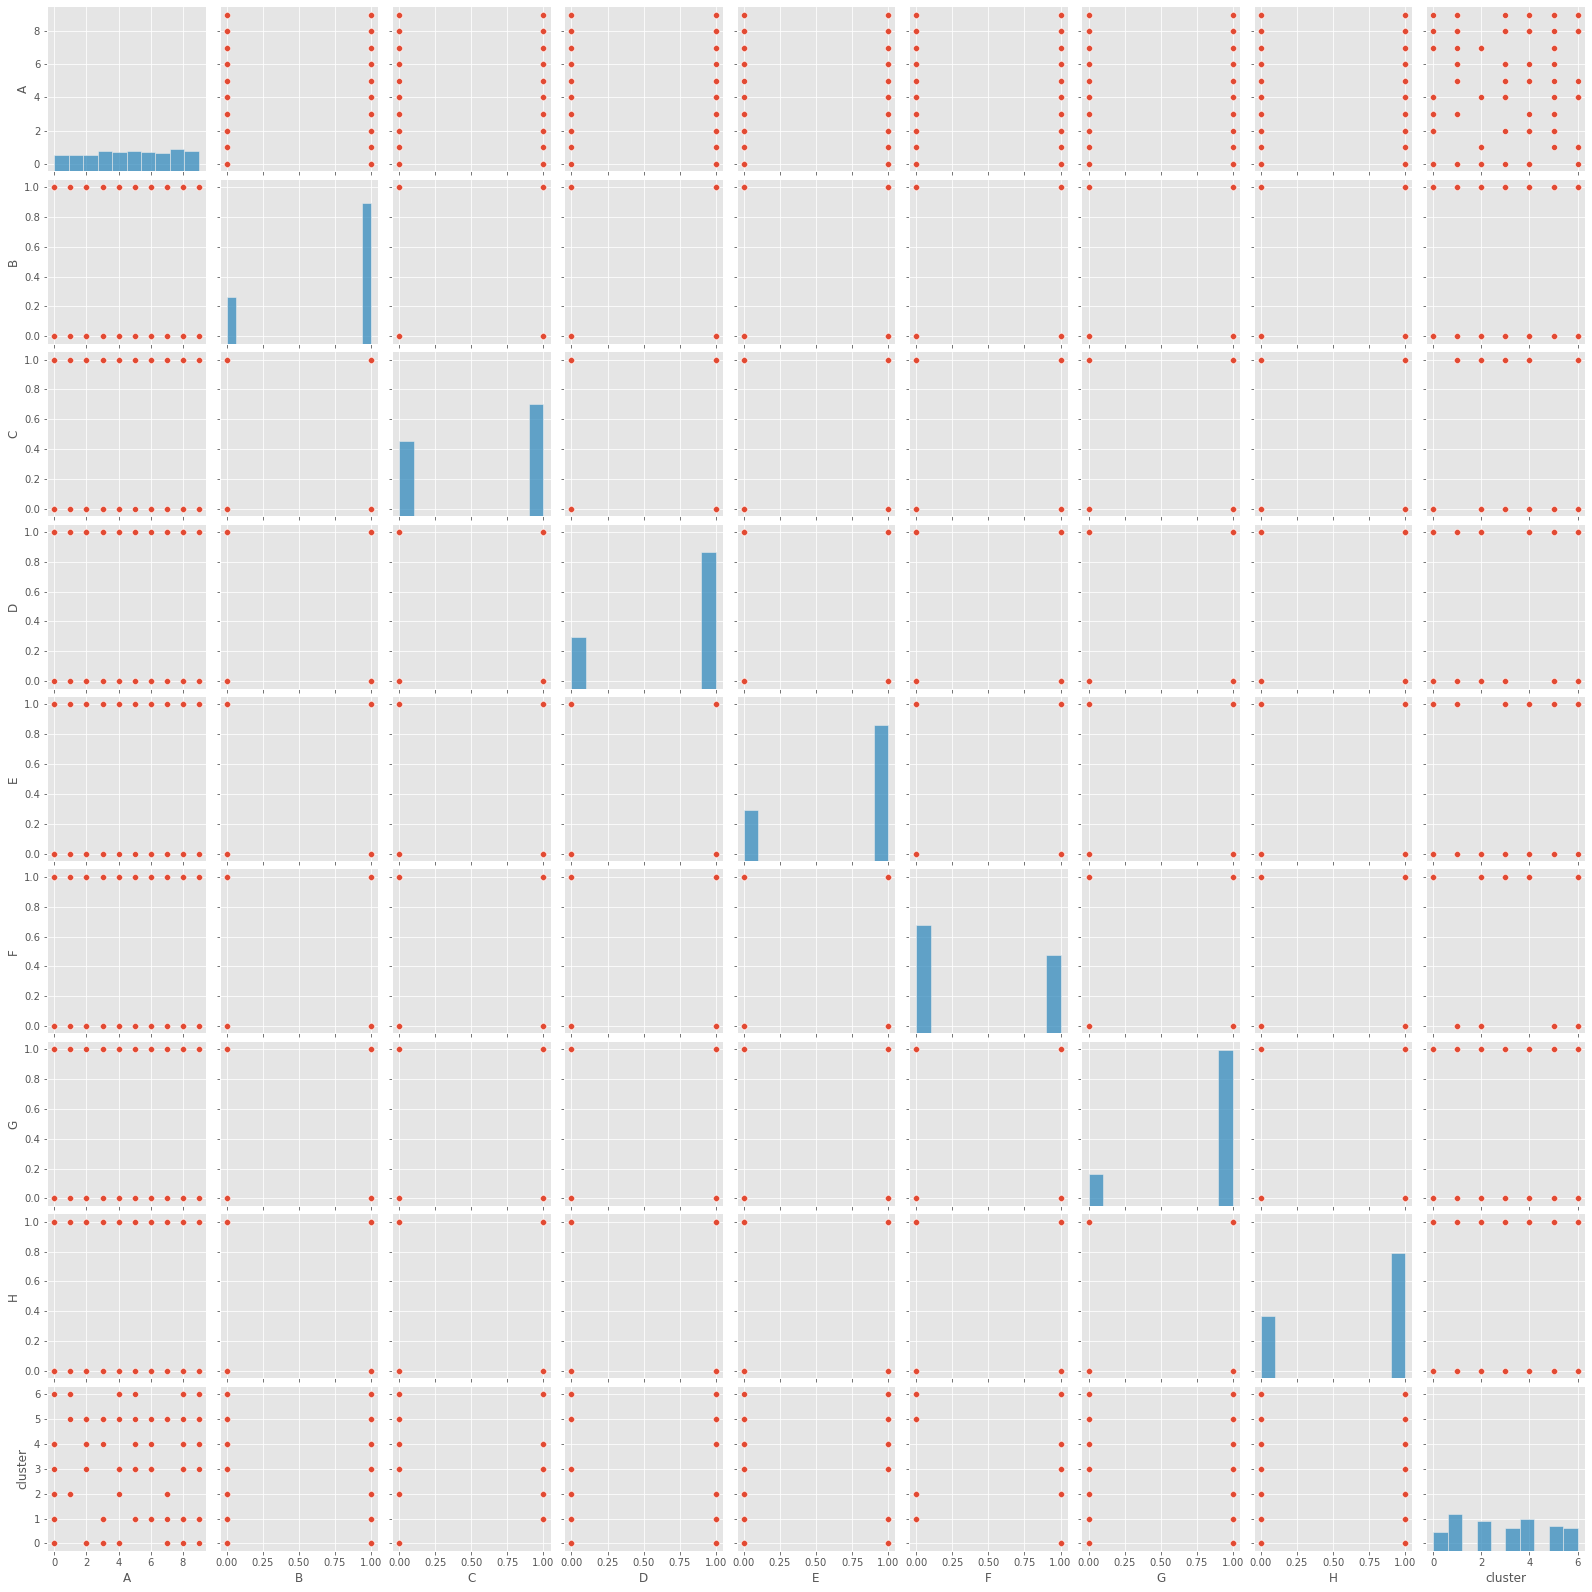

In [259]:
sns.pairplot(df)